In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)

# ---------------------------------------------------
# 1. Cargar dataset base
# ---------------------------------------------------
df = pd.read_csv("../data/clean/dataset_base_v21.csv")

print("Filas y columnas:", df.shape)
df.head()


Filas y columnas: (492, 31)


,campaign,categoria,confianza,confidence,dataset_split,domain,entidad,free_hosting,inclusion,is_https,label,matched_target,notas,route_type,ruido,score_total_v2,sector,sector_norm,source,timestamp,url,url_norm,domain_complexity,host_entropy,domain_whitelist_score,suspicious_path_token,token_density,trusted_token_context,infra_risk,fake_tld_in_subdomain_or_path,param_count_boost
0,NaN,banca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,caixabank,home bancaria oficial,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.caixabank.es/particular/banca-digi...,https://www.caixabank.es/particular/banca-digi...,0.508495,0.0,0.0,0.0,0.125,0.0,0.0,0.0,0.0
1,NaN,NaN,NaN,95.0,NaN,NaN,Ibercaja,0.0,NaN,1.0,0,NaN,NaN,home-particulares,NaN,NaN,Banca,NaN,manual,2025-10-22,https://www.ibercaja.es/particulares/,https://www.ibercaja.es/particulares,0.501250,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
2,NaN,NaN,NaN,90.0,NaN,NaN,WiZink,0.0,NaN,1.0,0,NaN,NaN,producto-tarjeta,NaN,NaN,Banca,NaN,manual,2025-10-22,https://www.wizink.es/tarjetas,https://www.wizink.es/tarjetas,0.451477,0.0,0.0,0.0,0.500,0.0,0.0,0.0,0.0
3,NaN,NaN,NaN,95.0,NaN,NaN,WiZink,0.0,NaN,1.0,0,NaN,NaN,home,NaN,NaN,Banca,NaN,manual,2025-10-22,https://www.wizink.es/,https://www.wizink.es,0.451477,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
4,NaN,NaN,NaN,90.0,NaN,NaN,Cetelem,0.0,NaN,1.0,0,NaN,NaN,credito-prestamos,NaN,NaN,Banca,NaN,manual,2025-10-22,https://www.cetelem.es/credito-y-prestamos/,https://www.cetelem.es/credito-y-prestamos,0.456514,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0


In [2]:
df.info()
df.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492 entries, 0 to 491
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   campaign                       98 non-null     object 
 1   categoria                      192 non-null    object 
 2   confianza                      150 non-null    float64
 3   confidence                     150 non-null    float64
 4   dataset_split                  150 non-null    object 
 5   domain                         150 non-null    object 
 6   entidad                        300 non-null    object 
 7   free_hosting                   150 non-null    float64
 8   inclusion                      150 non-null    float64
 9   is_https                       150 non-null    float64
 10  label                          492 non-null    int64  
 11  matched_target                 192 non-null    object 
 12  notas                          342 non-null    obj

campaign                         394
categoria                        300
confianza                        342
confidence                       342
dataset_split                    342
domain                           342
entidad                          192
free_hosting                     342
inclusion                        342
is_https                         342
label                              0
matched_target                   300
notas                            150
route_type                       342
ruido                            342
score_total_v2                   342
sector                           192
sector_norm                      342
source                           342
timestamp                        342
url                                0
url_norm                           0
domain_complexity                  0
host_entropy                       0
domain_whitelist_score             0
suspicious_path_token              0
token_density                      0
t

In [3]:
FEATURES = [
    "domain_complexity",
    "host_entropy",
    "domain_whitelist_score",
    "suspicious_path_token",
    "token_density",
    "trusted_token_context",
    "infra_risk",
    "fake_tld_in_subdomain_or_path",
    "param_count_boost",
]

df_features = df[FEATURES]

df_features.describe()



,domain_complexity,host_entropy,domain_whitelist_score,suspicious_path_token,token_density,trusted_token_context,infra_risk,fake_tld_in_subdomain_or_path,param_count_boost
count,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000
mean,0.524844,0.337502,0.006098,0.174797,0.054909,-0.217480,0.614634,0.233740,0.042344
std,0.097073,0.411775,0.077928,0.380180,0.110229,0.412951,1.163213,0.423639,0.154191
min,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000
25%,0.462651,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.508495,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.574713,0.830808,0.000000,0.000000,0.075000,0.000000,0.300000,0.000000,0.000000
max,0.930862,1.000000,1.000000,1.000000,0.691358,0.000000,3.300000,1.000000,0.833333


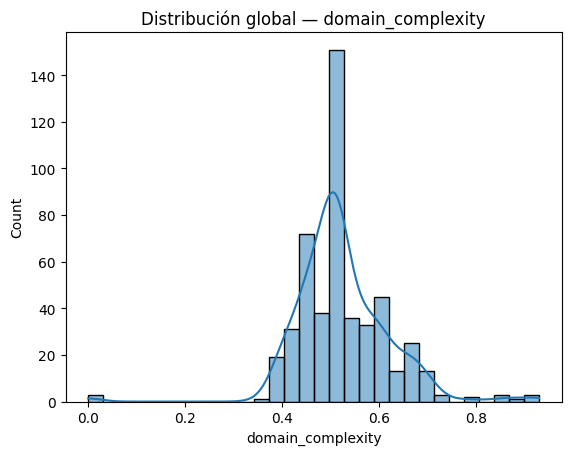

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df["domain_complexity"], bins=30, kde=True)
plt.title("Distribución global — domain_complexity")
plt.show()


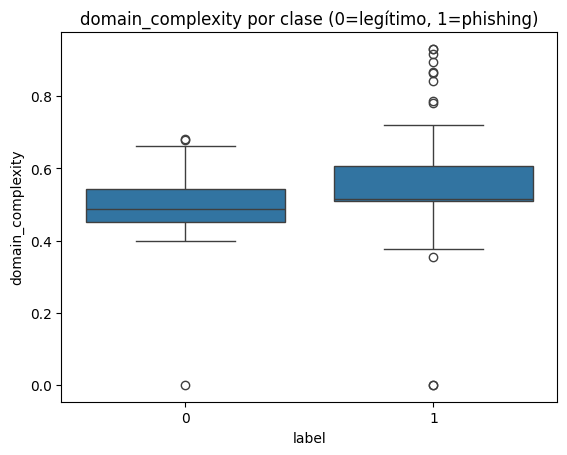

In [5]:
sns.boxplot(x=df["label"], y=df["domain_complexity"])
plt.title("domain_complexity por clase (0=legítimo, 1=phishing)")
plt.show()


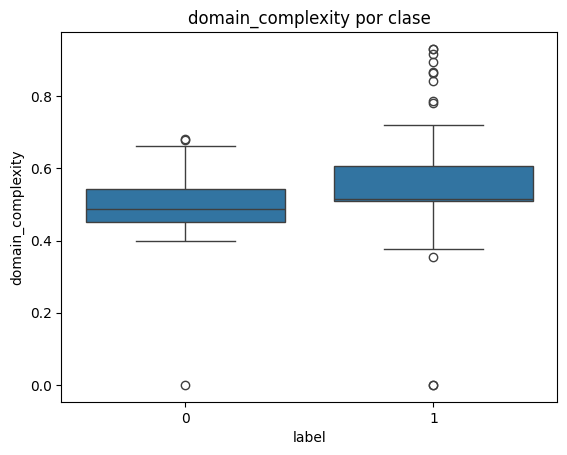

In [6]:
sns.boxplot(x=df["label"], y=df["domain_complexity"])
plt.title("domain_complexity por clase")
plt.show()


In [7]:
df.groupby("label")["domain_complexity"].describe()


,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
0,244.0,0.494437,0.073425,0.0,0.451477,0.488692,0.541505,0.682607
1,248.0,0.554761,0.107778,0.0,0.508495,0.514996,0.605450,0.930862


In [8]:
df["domain_complexity"].corr(df["label"])


np.float64(0.3110166134736269)

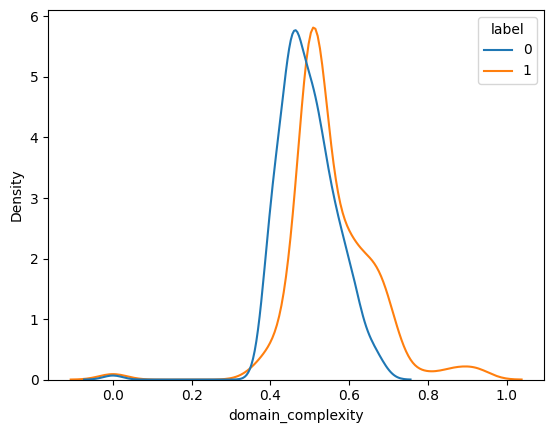

In [9]:
sns.kdeplot(data=df, x="domain_complexity", hue="label", common_norm=False)
plt.show()

In [10]:
import sys
import os

# Ruta raíz del proyecto (sube un nivel desde /notebooks)
ROOT = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(ROOT)

print("ROOT added to path:", ROOT)


ROOT added to path: /Users/test/Desktop/phishing-detector


In [11]:
import pandas as pd

# Cargar listas de dominios en español y globales neutrales
df_es = pd.read_csv("../docs/dominios_espanyoles.csv", header=None)
df_global = pd.read_csv("../docs/global_neutral_domains.csv", header=None)

spanish_whitelist = set(df_es[0].str.lower().str.strip())
global_whitelist = set(df_global[0].str.lower().str.strip())

print("ES whitelist:", len(spanish_whitelist))
print("Global whitelist:", len(global_whitelist))


ES whitelist: 201
Global whitelist: 77


In [12]:
full_whitelist = spanish_whitelist | global_whitelist


In [13]:
def compute_domain_complexity_only(url: str) -> float:
    try:
        return extract_features_v2(url, full_whitelist)[0]
    except:
        return 0.0


In [14]:
df["domain_complexity_new"] = df["url"].apply(compute_domain_complexity_only)


In [15]:
df.groupby("label")[["domain_complexity", "domain_complexity_new"]].describe()


domain_complexity                                               \
                  count      mean       std  min       25%       50%   
label                                                                  
0                 244.0  0.494437  0.073425  0.0  0.451477  0.488692   
1                 248.0  0.554761  0.107778  0.0  0.508495  0.514996   

                          domain_complexity_new                                \
            75%       max                 count mean  std  min  25%  50%  75%   
label                                                                           
0      0.541505  0.682607                 244.0  0.0  0.0  0.0  0.0  0.0  0.0   
1      0.605450  0.930862                 248.0  0.0  0.0  0.0  0.0  0.0  0.0   

            
       max  
label       
0      0.0  
1      0.0

In [16]:
import features.features_v2 as fv2

fv2.WHITELIST_GLOBAL = global_whitelist
fv2.WHITELIST_NEUTRAL = set()
fv2.WHITELIST_ES = spanish_whitelist
